# Re-order Smiles

### Look at each fragment and input the starting and end indices for the SMILES

In [1]:
import glob
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import pandas as pd
from rdkit.Chem import Descriptors
import subprocess
from openbabel import pybel
from rdkit.Chem.Draw import MolsToGridImage

IPythonConsole.drawOptions.addBondIndices = False
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 1500,1000

from csv import writer

In [2]:
def reorder_smiles(fragment_number, unit_type, starting_atom, end_atom=0):
    if unit_type=='c': # core units
        start_atom = starting_atom+1
        last_atom = end_atom+1
        filename = str(fragment_number) + '_C'
        subprocess.call('(obabel %s.mol -O %s.smi -xf %d -xl %d)' %(str(fragment_number), filename, start_atom, last_atom), shell=True)
        print('completed core')
        
    if unit_type=='t': # terminal units
        start_atom = starting_atom+1

        filename = str(fragment_number) + '_TR'
        subprocess.call('(obabel %s.mol -O %s.smi -xf %d)' %(str(fragment_number), filename, start_atom), shell=True)
        
        filename = str(fragment_number) + '_TL'
        subprocess.call('(obabel %s.mol -O %s.smi -xl %d)' %(str(fragment_number), filename, start_atom), shell=True)
        
        print('completed terminal')

Need to have the molecules already as a mol file.  
Fragment_number is just the name of the fragment to examine, in my case the fragments are numbered 0-402

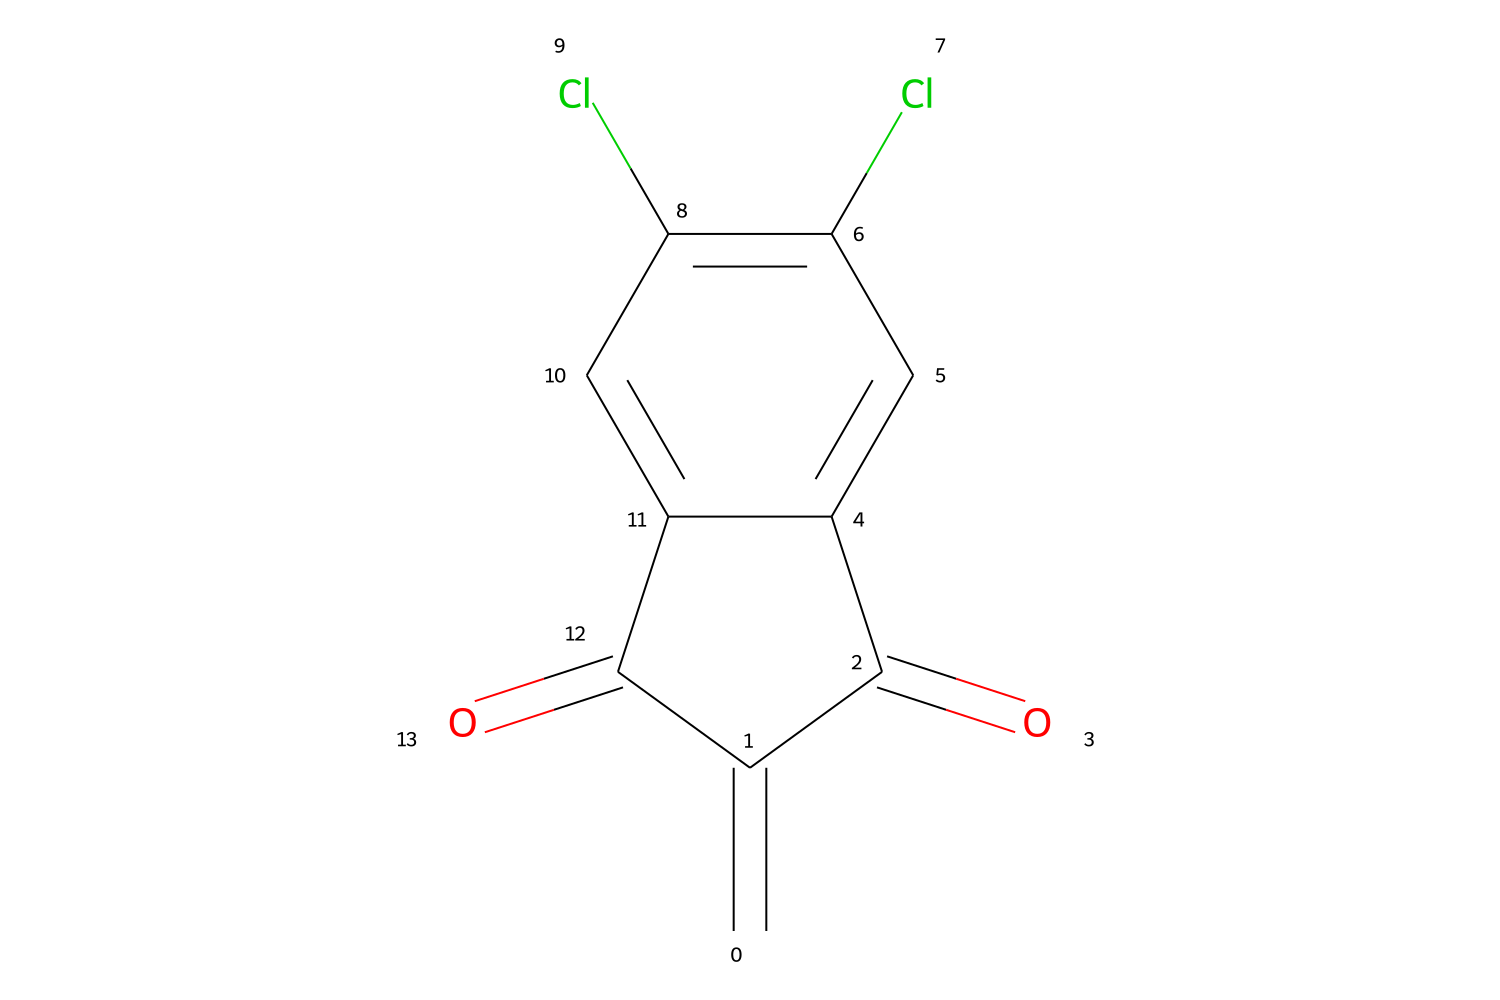

In [636]:
#input next fragment number to examine
fragment_number = 402

mol = Chem.MolFromMolFile(str(fragment_number) + '.mol')
smiles = Chem.MolToSmiles(mol)
mol

For unit_type, options are 'c' for 2 points of attachment or 't' for 1 point of attachment. 

In [634]:
reorder_smiles(fragment_number, unit_type = 'c', starting_atom = 0,  end_atom = 33)

completed terminal
